# Importing Libraries and Data

In [22]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [6]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [4]:
# importing dataframe
df = pd.read_csv(r'C:\users\Ali Hassan\Documents\US gun violence data analysis\Data\Prepared data\gun-violence-cleaned.csv', index_col = False)

In [8]:
# Display first few rows
df.head()

incident_id      date           state city_or_county  \
0       461105  1/1/2013    Pennsylvania     Mckeesport   
1       460726  1/1/2013      California      Hawthorne   
2       478855  1/1/2013            Ohio         Lorain   
3       478925  1/5/2013        Colorado         Aurora   
4       478959  1/7/2013  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...  longitude n_guns_involved  \
0                        False  ...   -79.8559               1   
1                        False  ...  -118.3330               1   
2                        False  ...   -82.1377               2   
3                        False  ...  -104.8020               1   
4                        False  ...   -79.9569               2   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                            Unknown   
3                                            Unknown   
4  Two firearms recovered. (Attempted) murder sui...   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                   -1   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                   62   
2  http://www.morningjournal.com/general-news/201...                   56   
3  http://denver.cbslocal.com/2013/01/06/officer-...                   40   
4  http://myfox8.com/2013/01/08/update-mother-sho...                   62   

  state_senate_district  
0                    -1 

In [10]:
# Check for missing values
print(df.isnull().sum())

incident_id                    0
date                           0
state                          0
city_or_county                 0
address                        0
n_killed                       0
n_injured                      0
incident_url                   0
source_url                     0
incident_url_fields_missing    0
congressional_district         0
gun_stolen                     0
gun_type                       0
incident_characteristics       0
latitude                       0
longitude                      0
n_guns_involved                0
notes                          0
participant_age_group          0
participant_gender             0
participant_status             0
participant_type               0
sources                        0
state_house_district           0
state_senate_district          0
dtype: int64


In [12]:
# Drop irrelevant or missing data
df = df.dropna()

In [14]:
# Display basic statistics
df.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           239677.000000   
mean   5.593343e+05       0.252290       0.494007                7.552698   
std    2.931287e+05       0.521779       0.729952                8.495690   
min    9.211400e+04       0.000000       0.000000               -1.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  239677.000000  239677.000000    239677.000000         239677.000000   
mean       37.580449     -89.236244         1.217902             46.315808   
std         5.048567      14.131003         3.583024             43.750294   
min        19.111400    -171.429000         1.000000             -1.000000   
25%        33.985200     -93.600900         1.000000              9.000000   
50%        38.570600     -86.249600         1.000000             35.000000   
75%        41.285100     -80.136700         1.000000             77.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count          239677.000000  
mean               17.579618  
std                15.112348  
min                -1.000000  
25%                 5.000000  
50%                15.000000  
75%                29.000000  
max                94.000000

In [16]:
# Remove Categorical Columns (K-Means Requires Numeric Data)
# Drop non-numeric columns (e.g., 'state', 'city', 'gun_type', etc.)
df_numeric = df.select_dtypes(include=[np.number])

In [18]:
# Display first few rows of numeric data
df_numeric.head()

incident_id  n_killed  n_injured  congressional_district  latitude  \
0       461105         0          4                      14   40.3467   
1       460726         1          3                      43   33.9090   
2       478855         1          3                       9   41.4455   
3       478925         4          0                       6   39.6518   
4       478959         2          2                       6   36.1140   

   longitude  n_guns_involved  state_house_district  state_senate_district  
0   -79.8559                1                    -1                     -1  
1  -118.3330                1                    62                     35  
2   -82.1377                2                    56                     13  
3  -104.8020                1                    40                     28  
4   -79.9569                2                    62                     27

In [24]:
# Standardize the Data (Scaling is Important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [26]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

In [28]:
# Check scaled data
df_scaled.describe()

incident_id      n_killed     n_injured  congressional_district  \
count  2.396770e+05  2.396770e+05  2.396770e+05            2.396770e+05   
mean  -1.271214e-16 -1.701672e-17 -8.721808e-17            1.612734e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00            1.000002e+00   
min   -1.593912e+00 -4.835191e-01 -6.767669e-01           -1.006712e+00   
25%   -8.555624e-01 -4.835191e-01 -6.767669e-01           -6.535914e-01   
50%   -5.372173e-02 -4.835191e-01 -6.767669e-01           -3.004704e-01   
75%    8.797986e-01 -4.835191e-01  6.931885e-01            2.880646e-01   
max    1.788084e+00  9.534271e+01  7.193087e+01            5.349465e+00   

           latitude     longitude  n_guns_involved  state_house_district  \
count  2.396770e+05  2.396770e+05     2.396770e+05          2.396770e+05   
mean   1.092034e-15  4.405076e-16     1.316276e-17         -3.984402e-17   
std    1.000002e+00  1.000002e+00     1.000002e+00          1.000002e+00   
min   -3.658283e+00 -5.816497e+00    -6.081512e-02         -1.081499e+00   
25%   -7.121340e-01 -3.088716e-01    -6.081512e-02         -8.529288e-01   
50%    1.961256e-01  2.113544e-01    -6.081512e-02         -2.586458e-01   
75%    7.338041e-01  6.439432e-01    -6.081512e-02          7.013497e-01   
max    6.686337e+00  1.320994e+01     1.112979e+02          1.953555e+01   

       state_senate_district  
count           2.396770e+05  
mean           -1.071994e-16  
std             1.000002e+00  
min            -1.229435e+00  
25%            -8.324083e-01  
50%            -1.706964e-01  
75%             7.557003e-01  
max             5.056828e+00

# Elbow method

In [31]:
# Use the Elbow Method to Determine Optimal K (Clusters)
wcss = []  # Within-cluster sum of squares


In [33]:
# Try different values of k (number of clusters)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Append WCSS value

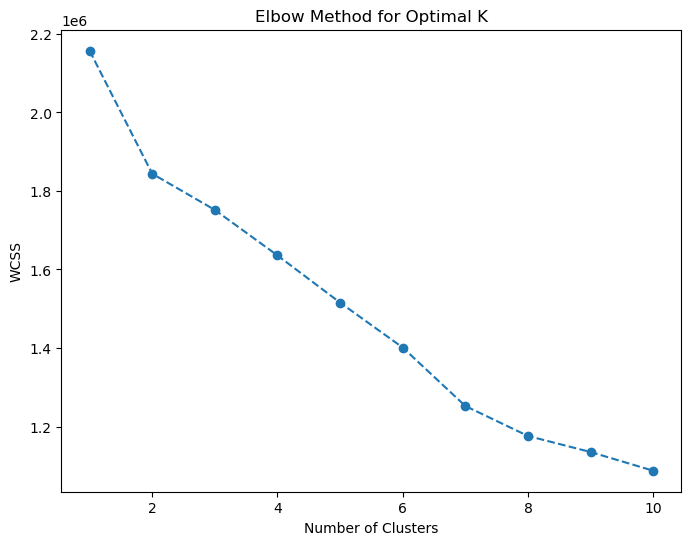

In [35]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

### **📌 Choosing the Optimal Number of Clusters**
- The **"elbow point"** is where the WCSS curve starts to bend.
- Based on the plot, the optimal number of clusters is around **K = 4** 
- Choosing too many clusters may result in **overfitting**, while too few clusters may **miss important patterns**.

# k-means clustering

In [39]:
optimal_k = 4

In [41]:
# Train K-Means Model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

In [43]:
# Add cluster labels to original dataset
df['Cluster'] = df_scaled['Cluster']

In [45]:
# Display first few rows with clusters
df.head()

incident_id      date           state city_or_county  \
0       461105  1/1/2013    Pennsylvania     Mckeesport   
1       460726  1/1/2013      California      Hawthorne   
2       478855  1/1/2013            Ohio         Lorain   
3       478925  1/5/2013        Colorado         Aurora   
4       478959  1/7/2013  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...  n_guns_involved  \
0                        False  ...                1   
1                        False  ...                1   
2                        False  ...                2   
3                        False  ...                1   
4                        False  ...                2   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                            Unknown   
3                                            Unknown   
4  Two firearms recovered. (Attempted) murder sui...   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                   -1   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                   62   
2  http://www.morningjournal.com/general-news/201...                   56   
3  http://denver.cbslocal.com/2013/01/06/officer-...                   40   
4  http://myfox8.com/2013/01/08/update-mother-sho...                   62   

  state_senate_district Cluster  
0                    -1       0  
1                    35       0  
2       

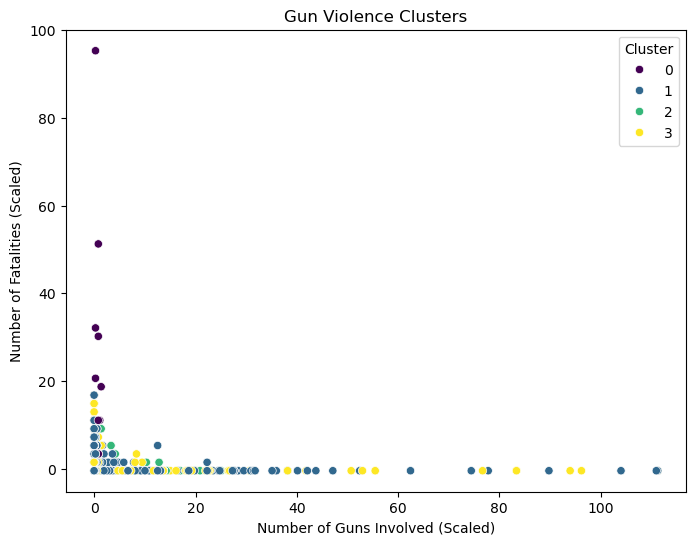

In [49]:
# Visualize Clusters Using Scatter Plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['n_guns_involved'], y=df_scaled['n_killed'], hue=df_scaled['Cluster'], palette='viridis')
plt.xlabel("Number of Guns Involved (Scaled)")
plt.ylabel("Number of Fatalities (Scaled)")
plt.title("Gun Violence Clusters")
plt.legend(title="Cluster")
plt.show()

### **Interpretation of Clustering Results**
- The scatter plot shows **distinct clusters** of gun violence incidents.
- Clusters may represent:
  1. **Low-severity incidents** (fewer guns, fewer casualties).
  2. **High-severity incidents** (multiple guns, high fatalities).
  3. **Anomalies or outliers** (mass shootings or extreme cases).
- If clusters **do not make sense**, feature selection and clustering parameters may need refinement.

In [56]:
# Select only numeric columns before calculating statistics
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [58]:
# Calculate mean values for each cluster
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()


In [62]:
# Display the cluster summary in Jupyter Notebook
print(cluster_summary)


           incident_id  n_killed  n_injured  congressional_district  \
Cluster                                                               
0        559819.236049  0.171311   2.425725                6.445295   
1        837117.186759  0.261759   0.377680                4.229357   
2        310676.267370  0.227867   0.373077                4.883328   
3        539683.312195  0.287213   0.368408               14.683023   

          latitude  longitude  n_guns_involved  state_house_district  \
Cluster                                                                
0        37.678106 -88.345211         1.063107             40.706587   
1        38.451421 -89.270909         1.345408             25.194394   
2        39.260210 -89.505405         1.105595             28.922409   
3        34.593747 -89.063540         1.238789             91.842729   

         state_senate_district  Cluster  
Cluster                                  
0                    15.652060      0.0  
1             

In [64]:
# If the output is too long, show only the first few rows
cluster_summary.head()


incident_id  n_killed  n_injured  congressional_district  \
Cluster                                                               
0        559819.236049  0.171311   2.425725                6.445295   
1        837117.186759  0.261759   0.377680                4.229357   
2        310676.267370  0.227867   0.373077                4.883328   
3        539683.312195  0.287213   0.368408               14.683023   

          latitude  longitude  n_guns_involved  state_house_district  \
Cluster                                                                
0        37.678106 -88.345211         1.063107             40.706587   
1        38.451421 -89.270909         1.345408             25.194394   
2        39.260210 -89.505405         1.105595             28.922409   
3        34.593747 -89.063540         1.238789             91.842729   

         state_senate_district  Cluster  
Cluster                                  
0                    15.652060      0.0  
1                    10.784326      1.0  
2                    12.780739      2.0  
3                    31.310728      3.0

In [66]:
# Save the summary as a CSV file (optional)
cluster_summary.to_csv("cluster_summary.csv")

### ** Key Insights from Clustering Analysis**
- Different clusters **group similar incidents**, revealing potential trends.
- **High-risk categories** can be identified (e.g., incidents with multiple firearms are deadlier).
- Law enforcement and policymakers can use these insights to **focus on high-risk areas**.
- Further steps could involve **geospatial mapping** to correlate clusters with location.
